In [5]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import seaborn
import re
import string
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import joblib

In [6]:
def clean_email(text: str) -> str:
    text = re.sub(r'<[^>]+>', '', text) # remove HTML tags
    text = re.sub(r'http\S+', '', text) # remove URLs
    # TODO: add a count of URLs to email data
    text = re.sub(r'\d+', '', text) # remove numerical text
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove punctuation
    text = text.lower().strip() # lowercase
    return text

def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    """
    """
    df['clean_email'] = df['body'].astype(str).apply(clean_email)
    return df

In [7]:
df = pd.read_csv('../../data/analysis/emails_augmented.csv') 
assert 'body' in df.columns and 'label' in df.columns, "Missing required columns."
df = preprocess(df)
X = df['clean_email']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
LogisticRegression = joblib.load('../../output/models/LogisticRegression.joblib')
MLPClassifier = joblib.load('../../output/models/LogisticRegression.joblib')
MultinomialNB = joblib.load('../../output/models/LogisticRegression.joblib')
RandomForest = joblib.load('../../output/models/LogisticRegression.joblib')

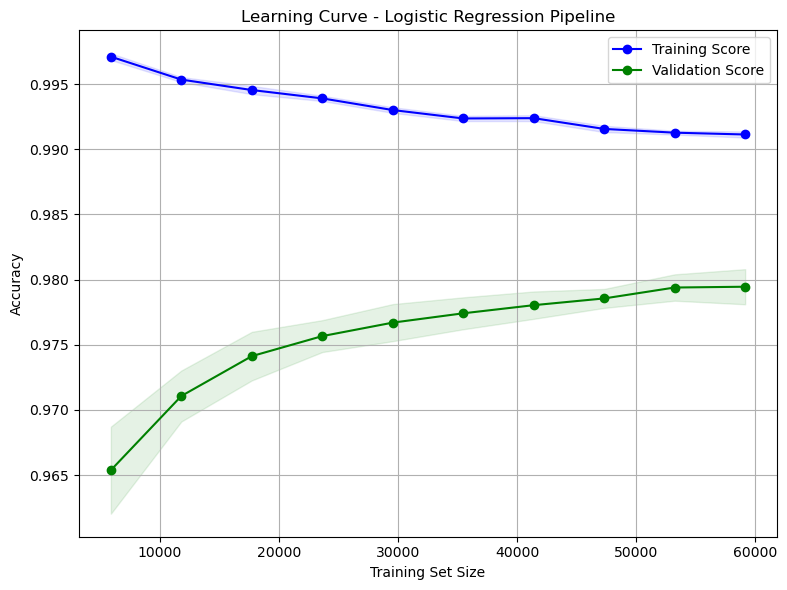

<Figure size 640x480 with 0 Axes>

In [9]:
#Logistic Regression Learning Curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generate learning curve data
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
train_sizes, train_scores, validation_scores = learning_curve(
    estimator= LogisticRegression,
    X=X_train,
    y=y_train,
    cv=kfold,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Compute mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color='green')
plt.title('Learning Curve - Logistic Regression Pipeline')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('../../output/results/LogisticRegression_learning_curve.png', dpi=300)

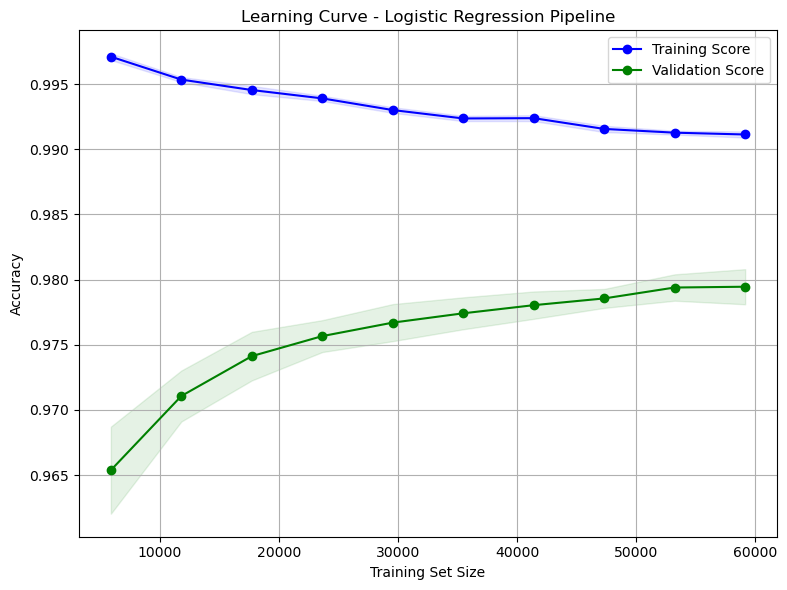

<Figure size 640x480 with 0 Axes>

In [10]:
#MLP Classifier Learning Curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generate learning curve data
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
train_sizes, train_scores, validation_scores = learning_curve(
    estimator= MLPClassifier,
    X=X_train,
    y=y_train,
    cv=kfold,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Compute mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color='green')
plt.title('Learning Curve - Logistic Regression Pipeline')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('../../output/results/MLPClassifier_learning_curve.png', dpi=300)

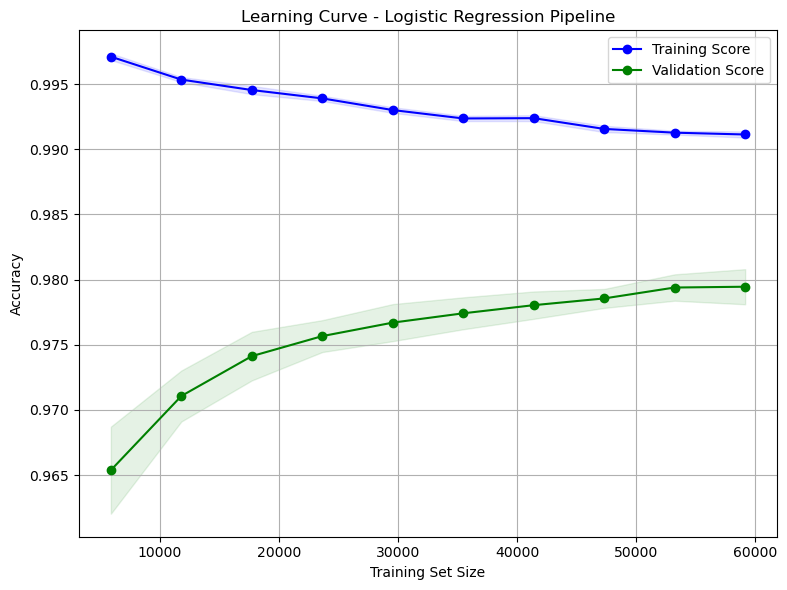

<Figure size 640x480 with 0 Axes>

In [11]:
#MultinomialNB Learning Curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generate learning curve data
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
train_sizes, train_scores, validation_scores = learning_curve(
    estimator= MultinomialNB,
    X=X_train,
    y=y_train,
    cv=kfold,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Compute mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color='green')
plt.title('Learning Curve - Logistic Regression Pipeline')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('../../output/results/MultinomialNB_learning_curve.png', dpi=300)

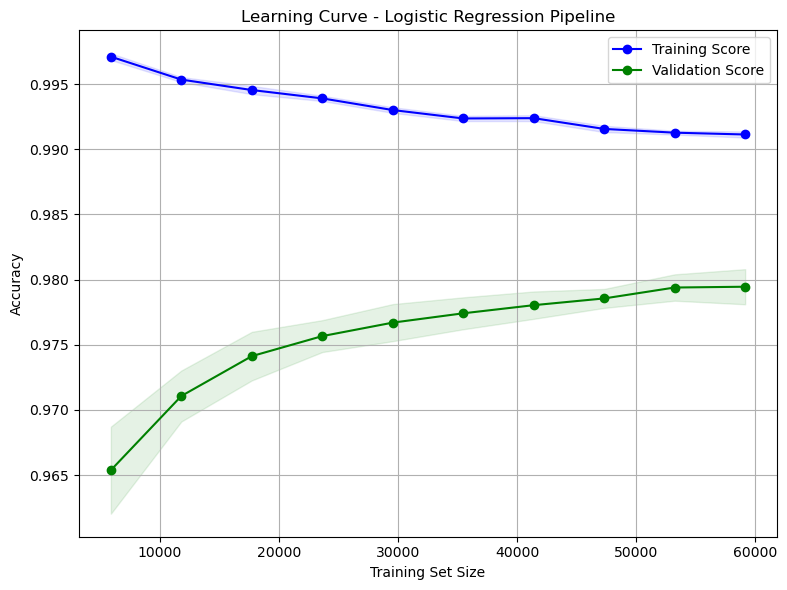

<Figure size 640x480 with 0 Axes>

In [12]:
#RandomForest Learning Curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Generate learning curve data
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
train_sizes, train_scores, validation_scores = learning_curve(
    estimator= RandomForest,
    X=X_train,
    y=y_train,
    cv=kfold,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Compute mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, validation_scores_mean, 'o-', color='green', label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color='green')
plt.title('Learning Curve - Logistic Regression Pipeline')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig('../../output/results/RandomForest_learning_curve.png', dpi=300)

KeyboardInterrupt: 

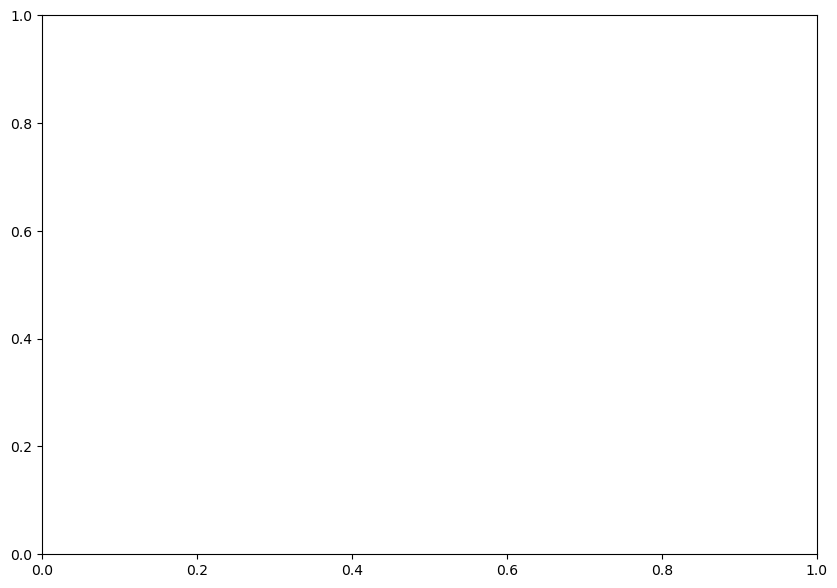

In [15]:
#Combined Learning Curve
from sklearn.model_selection import learning_curve, KFold
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Helper function to plot learning curve for one model
def plot_learning_curve(ax, model, label, color, X, y, cv):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        cv=cv,
        scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    ax.plot(train_sizes, train_mean, 'o-', color=color, label=f'{label} - Train')
    ax.plot(train_sizes, val_mean, '--', color=color, label=f'{label} - Validation')
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color=color)
    ax.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color=color)

models = {
    'Logistic Regression': LogisticRegression,
    'MLP': MLPClassifier,
    'Random Forest': RandomForest,
    'Naive Bayes': MultinomialNB
}

colors = ['blue', 'green', 'red', 'orange']

# Set up plot
fig, ax = plt.subplots(figsize=(10, 7))
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Plot all models
for (label, model), color in zip(models.items(), colors):
    plot_learning_curve(ax, model, label, color, X_train, y_train, cv)

# Final formatting
ax.set_title('Learning Curves - Model Comparison')
ax.set_xlabel('Training Set Size')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right')
ax.grid(True)
fig.tight_layout()
fig.savefig('../../output/results/combined_learning_curves.png', dpi=300)
plt.show()

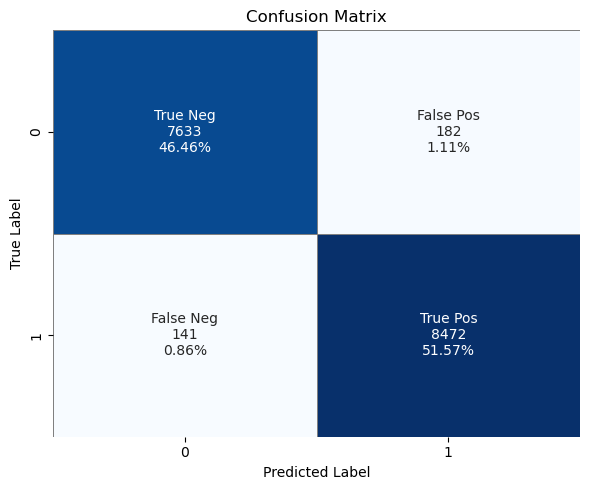

In [16]:
#Logistic Regression Confusion Matrix
y_pred = LogisticRegression.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value:0.0f}" for value in cf_matrix.flatten()]
group_percentages = [f"{value:.2%}" for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f"{name}\n{count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig('../../output/results/LogisticRegression_confusion_matrix.png', dpi=300)
plt.show()

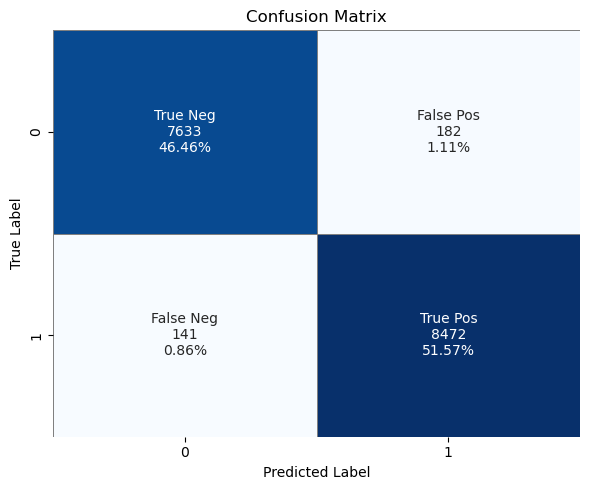

In [17]:
#MLP Classifier Confusion Matrix
y_pred = MLPClassifier.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value:0.0f}" for value in cf_matrix.flatten()]
group_percentages = [f"{value:.2%}" for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f"{name}\n{count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig('../../output/results/MLPClassifier_confusion_matrix.png', dpi=300)
plt.show()

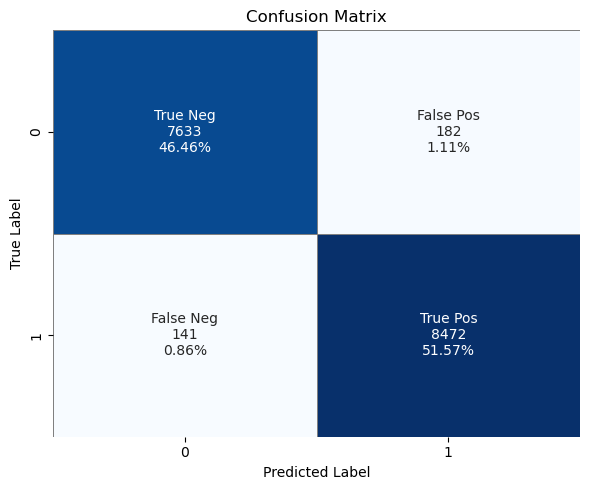

In [19]:
#MultinomialNB Confusion Matrix
y_pred = MultinomialNB.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value:0.0f}" for value in cf_matrix.flatten()]
group_percentages = [f"{value:.2%}" for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f"{name}\n{count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig('../../output/results/MultinomialNB_confusion_matrix.png', dpi=300)
plt.show()

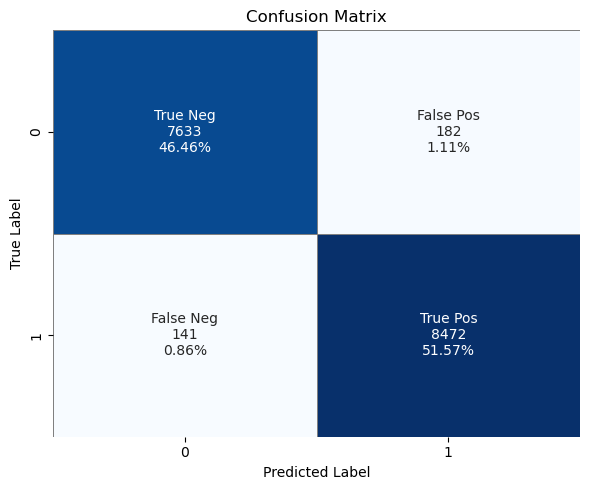

In [18]:
#RandomForest Confusion Matrix
y_pred = RandomForest.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = [f"{value:0.0f}" for value in cf_matrix.flatten()]
group_percentages = [f"{value:.2%}" for value in cf_matrix.flatten() / np.sum(cf_matrix)]

labels = [f"{name}\n{count}\n{percent}" for name, count, percent in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)
plt.figure(figsize=(6, 5))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig('../../output/results/RandomForest_confusion_matrix.png', dpi=300)
plt.show()